In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df = pd.read_csv('Transactions.csv')

In [70]:
print(df.head())
print(df.info())
print(df.describe())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5

In [71]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [72]:
# EDA - Total Sales Over Time (Monthly)
df['Month'] = df['TransactionDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalValue'].sum()

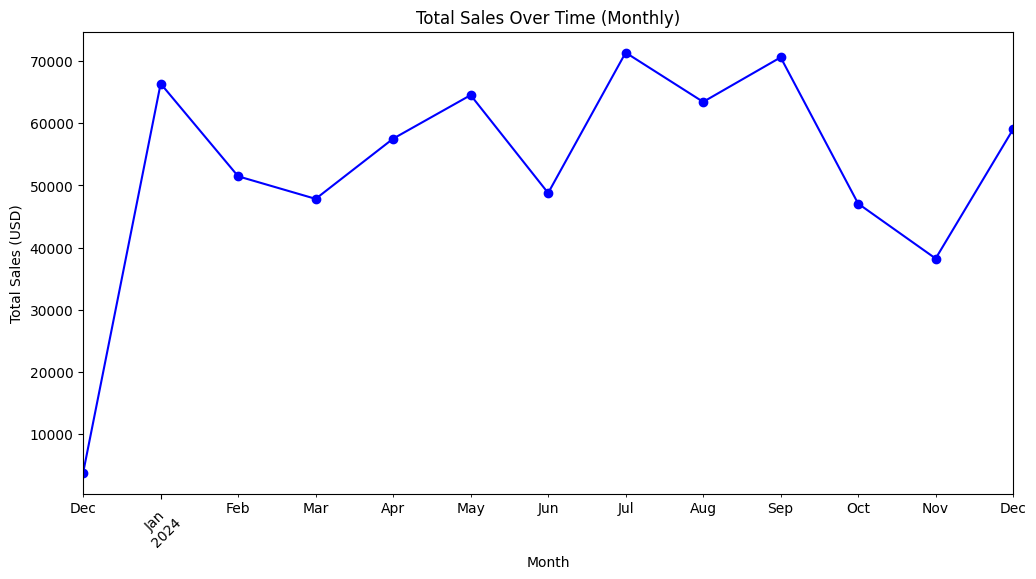

In [73]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


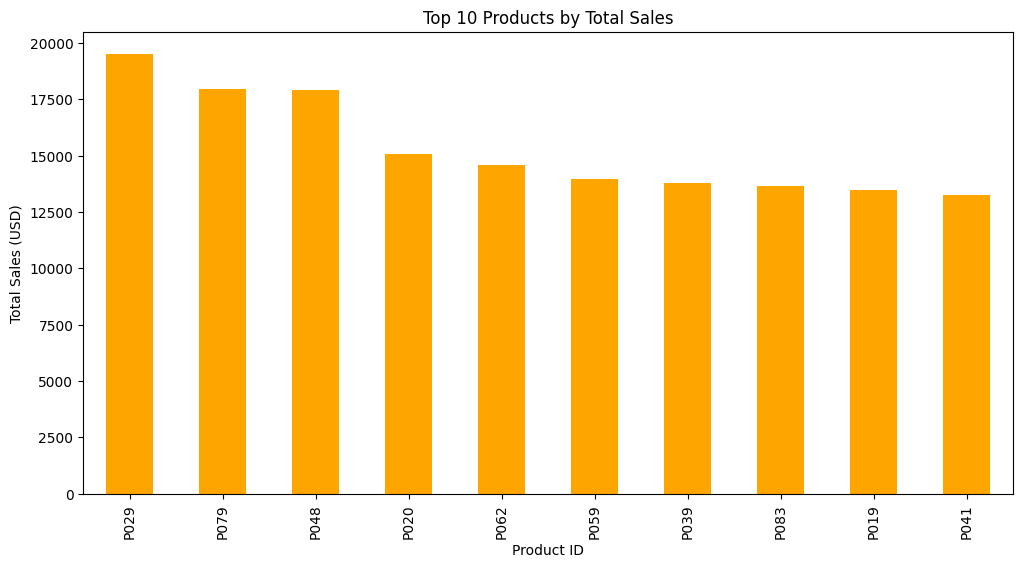

In [74]:
# EDA - Sales Distribution by Product
plt.figure(figsize=(12, 6))
product_sales = df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
product_sales.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (USD)')
plt.show()

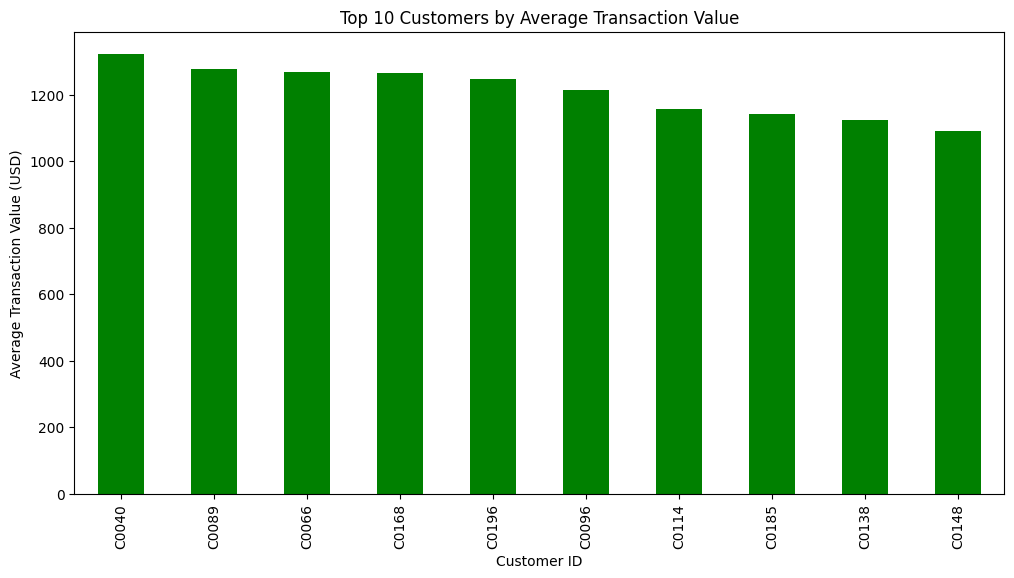

In [75]:
# EDA - Average Transaction Value by Customer
customer_avg_transaction = df.groupby('CustomerID')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
customer_avg_transaction.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Customers by Average Transaction Value')
plt.xlabel('Customer ID')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

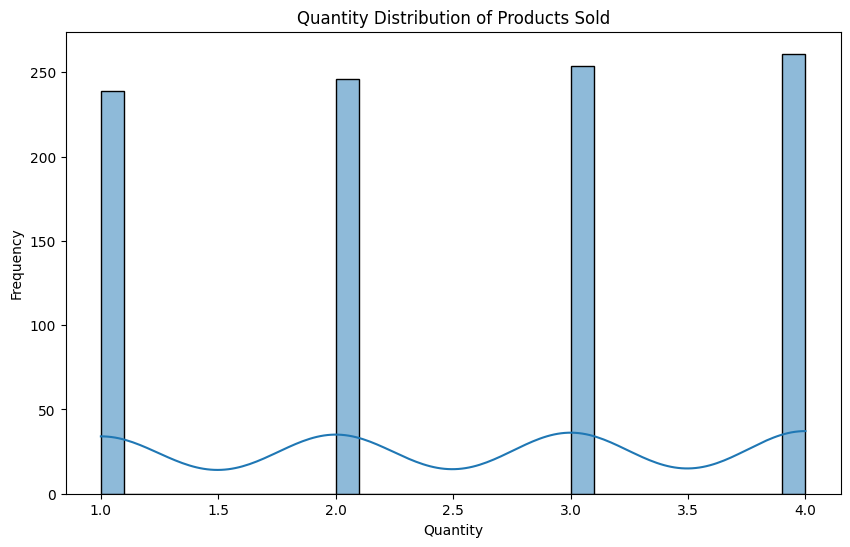

In [76]:
# EDA - Quantity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution of Products Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

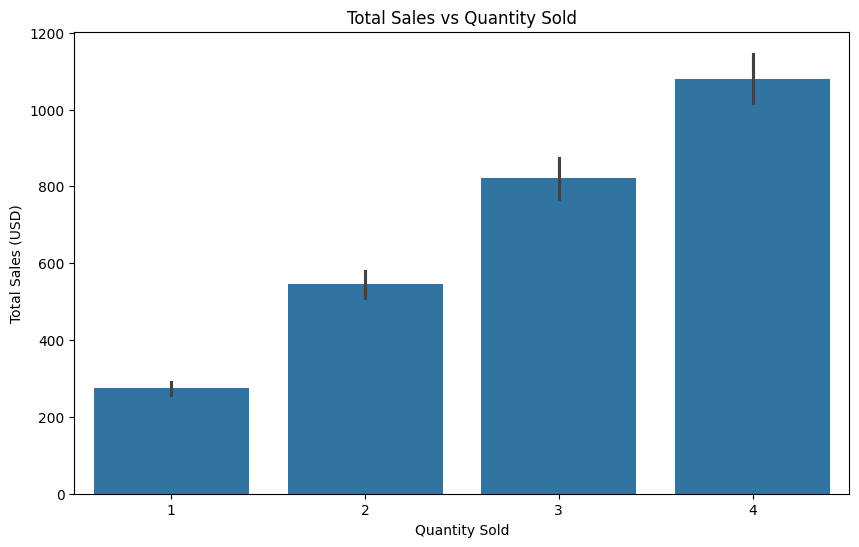

In [81]:
# EDA - Total Sales vs Quantity Sold
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Quantity'], y=df['TotalValue'])
plt.title('Total Sales vs Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales (USD)')
plt.show()